### **About the Dataset used in this Project:**

A mixed **Waste dataset** was used for this project. It comprised 6,884 images images 416x416 colour images in 11 classes.

The training images were 4800, testing images were ¬1000 and validation images were ¬1000 in quantity.

The classes in the dataset included:
'cans', 'tins', 'metal_trays_plates_pans','cardboard', 'styrofoam container', 'envelope', 'paper', 'carton', 'plastic', 'organics', 'general'

¬2100 were recyclables, ¬2100 organics, ¬2100 general

The following pre-processing steps was applied to each image:
* Auto-orientation of pixel data (with EXIF[Exchangeable Image File Format]-orientation stripping)
* Resize to 416x416 (Stretch)

N.B - EXIF-orientation stripping involves analyzing the orientation information stored in the EXIF metadata and rotating or flipping the image data accordingly to ensure that it is displayed correctly.

The following augmentation was applied to create 3 versions of each source image:
* 50% probability of horizontal flip
* 50% probability of vertical flip
* Equal probability of one of the following 90-degree rotations: none, clockwise, counter-clockwise, upside-down
* Random shear of between -15° to +15° horizontally and -15° to +15° vertically

**Reference**
Provided by a Roboflow user
License: CC BY 4.0

**Downloaded** from: several sources (links to be added)

**Blue Bin:Recyclables**
* Metals ('cans', 'tins', 'metal_trays_plates_pans'): https://www.kaggle.com/datasets/sumn2u/garbage-classification-v2?select=metal
* Cardboard boxes: https://universe.roboflow.com/dataset-t7hz7/cardboard-eupc8/dataset/3
* Styrofoam containers : https://universe.roboflow.com/namseoul-qobk6/styrofoam-qt1kt/dataset/1
Envelopes: https://universe.roboflow.com/mateo-ojeda/envelope-c6750/dataset/1
Paper: https://universe.roboflow.com/natalie-perrochon-yqnhb/recycling-try-2/dataset/16
* Carton juice and milk boxes: https://app.roboflow.com/waste-z6zen/carton-xuife/1
* Plastic bottles: https://universe.roboflow.com/betul-rt4lp/plastic-bottle-cuwtu/dataset/1

**Green Bin: Organics** (fruits, vegetables, scraps from plates and garbage dumps, rotting foods)
https://universe.roboflow.com/patata-man-y8maj/bio-waste/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true
https://universe.roboflow.com/search?q=organic%20waste

**Black Bin: General waste**
* mugs: https://universe.roboflow.com/gsa-team/mugs-vhjth
* broken plates: https://app.roboflow.com/waste-z6zen/general-1/1
* cigarettes: https://universe.roboflow.com/universitadellacalabria-icrla/cigarettebuttdetection-tlhei
* Masks and gloves: https://universe.roboflow.com/sultana-almasoud/our_gp2



In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 4.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

#### **Import Libraries**

In [ ]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
sns.set_style('darkgrid')
%matplotlib inline
import shutil
import yaml

## **Mounting the Google Drive**

**Environmental conditions:**
* Google Colab was employed
* T4 GPU runtime type

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Data Loading and Exploration**

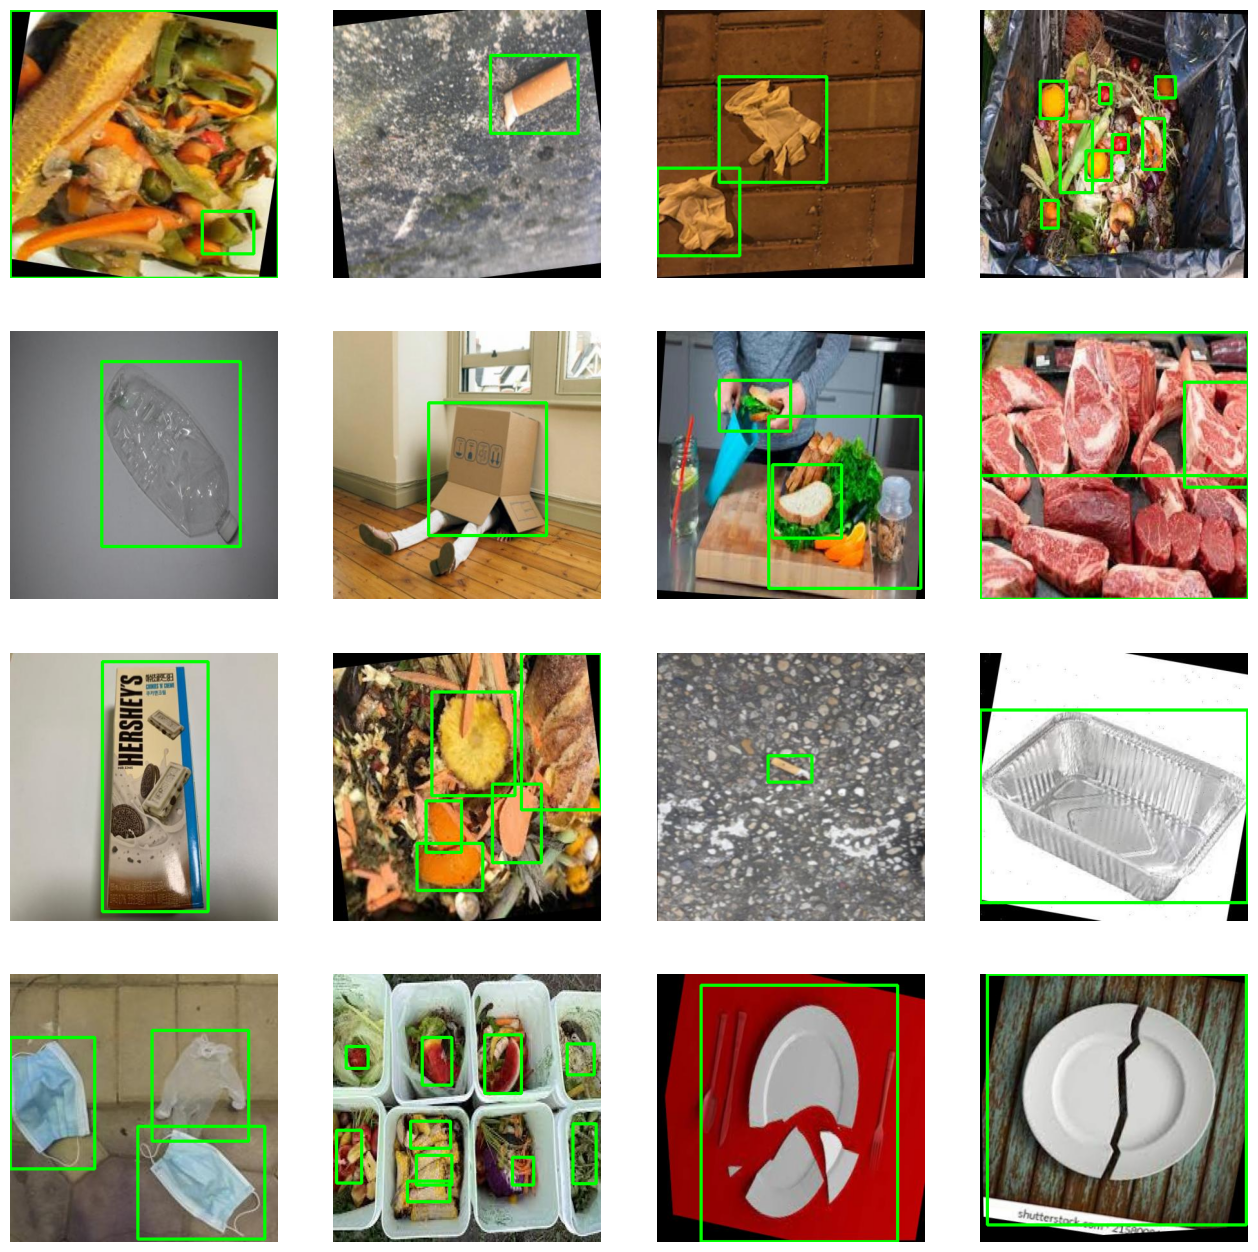

In [ ]:
# Data can be accessed via:
#Training set: https://drive.google.com/drive/folders/14r6NAWQWF5M27_4VdZ1Ui7fHlWBXv5SJ?usp=drive_link
#Testing set: https://drive.google.com/drive/folders/1IUxDZlB2M78FkfC1-jWYhdiL4u8kZk2d?usp=drive_link
#Valid set: https://drive.google.com/drive/folders/1uJM7bTtFTaWIH5ZusH5jh7UqIcNZ_i63?usp=drive_link

# Define the paths to the images and labels directories
train_images = "/content/drive/My Drive/Colab Notebooks/Fullstack Project/train/images"
train_labels = "/content/drive/My Drive/Colab Notebooks/Fullstack Project/train/labels"

test_images = "/content/drive/My Drive/Colab Notebooks/Fullstack Project/test/images"
test_labels = "/content/drive/My Drive/Colab Notebooks/Fullstack Project/test/labels"

val_images = "/content/drive/My Drive/Colab Notebooks/Fullstack Project/valid/images"
val_labels = "/content/drive/My Drive/Colab Notebooks/Fullstack Project/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Specify the number of images to select
num_images_to_select = 16


#Check if there are enough images available for sampling
if len(image_files) >= num_images_to_select:
    # Choose 16 random image files from the list
    random_images = random.sample(image_files, num_images_to_select)

    # Set up the plot
    fig, axs = plt.subplots(4, 4, figsize=(16, 16))

    # Loop over the random images and plot the object detections
    for i, image_file in enumerate(random_images):
        row = i // 4
        col = i % 4

        # Load the image
        image_path = os.path.join(train_images, image_file)
        image = cv2.imread(image_path)

        # Load the labels for this image
        label_file = os.path.splitext(image_file)[0] + ".txt"
        label_path = os.path.join(train_labels, label_file)
        with open(label_path, "r") as f:
            labels = f.read().strip().split("\n")

        # Loop over the labels and plot the object detections
        for label in labels:
            if len(label.split()) != 5:
                continue
            class_id, x_center, y_center, width, height = map(float, label.split())
            x_min = int((x_center - width/2) * image.shape[1])
            y_min = int((y_center - height/2) * image.shape[0])
            x_max = int((x_center + width/2) * image.shape[1])
            y_max = int((y_center + height/2) * image.shape[0])
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

        # Show the image with the labels
        axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[row, col].axis('off')

    plt.show()
else:
    print("There are not enough images available for sampling.")

### **Explore the dataset**

In [ ]:
# Count the number of image files in each directory
train_images_count = len(os.listdir(train_images))
test_images_count = len(os.listdir(test_images))
val_images_count = len(os.listdir(val_images))

# Print the counts
print(f"Training Dataset Size: {train_images_count} images")
print(f"Testing Dataset Size: {test_images_count} images")
print(f"Validation Dataset Size: {val_images_count} images")

Training Dataset Size: 4800 images
Testing Dataset Size: 1052 images
Validation Dataset Size: 1136 images


### Setup yaml file

In [ ]:
text = """
train: /content/drive/My Drive/Colab Notebooks/Fullstack Project/train/images
val: /content/drive/My Drive/Colab Notebooks/Fullstack Project/valid/images

nc: 11
names: ['cans', 'tins', 'metal_trays_plates_pans','cardboard', 'styrofoam container', 'envelope', 'paper', 'carton', 'plastic', 'organics', 'general']

"""
with open("/content/drive/My Drive/Colab Notebooks/Fullstack Project/data.yaml", 'w') as file:
    file.write(text)



### **Load the Pretrained YOLOv8n Model**


image 1/1 /content/drive/My Drive/Colab Notebooks/Fullstack Project/sample image/-1x-1_jpg.rf.a2d581abfe7a696381d212704cb7219e.jpg: 416x416 1 orange, 8.1ms
Speed: 1.7ms preprocess, 8.1ms inference, 3461.3ms postprocess per image at shape (1, 3, 416, 416)


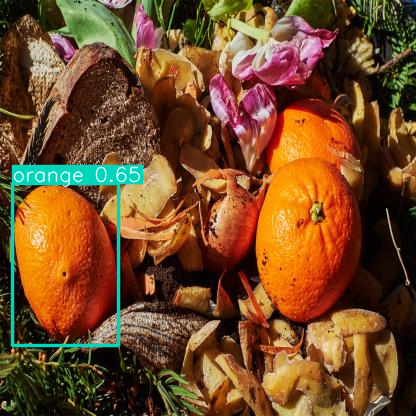

In [ ]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Save the model to Google Drive
model.save("/content/drive/My Drive/Colab Notebooks/Fullstack Project/yolov8n_model.pt")

# Use the model to detect object
image = "/content/drive/My Drive/Colab Notebooks/Fullstack Project/sample image/-1x-1_jpg.rf.a2d581abfe7a696381d212704cb7219e.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

### **Load yaml file**

In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('/content/drive/My Drive/Colab Notebooks/Fullstack Project/yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data='/content/drive/My Drive/Colab Notebooks/Fullstack Project/data.yaml',epochs=50, imgsz = 416, batch = 64 ,lr0=0.0001, dropout= 0.15, device = 0, project='/content/drive/My Drive/Colab Notebooks/Fullstack Project/runs')


Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/My Drive/Colab Notebooks/Fullstack Project/data.yaml, epochs=50, time=None, patience=100, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=/content/drive/My Drive/Colab Notebooks/Fullstack Project/runs, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, re

train: Scanning /content/drive/My Drive/Colab Notebooks/Fullstack Project/train/labels... 4800 images, 3 backgrounds, 5 corrupt: 100%|██████████| 4800/4800 [15:31<00:00,  5.15it/s]

train: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Fullstack Project/train/images/1-3-_jpg.rf.f4b5b4cd756e8ab68a5a6c6b3143e5a6.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     4.5004      8.9992]
train: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Fullstack Project/train/images/1-8-_jpg.rf.e4043fe84097e663fc976d2298916ef6.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        4.5           9]
train: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Fullstack Project/train/images/1-8-_jpg.rf.fc33617a01b61ea3f9ea9e935c6026bf.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        4.5           9]
train: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Fullstack Project/train/images/106-2-_jpg.rf.743e70ab7056514f56803c03d11d6760.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     4.5254      8.9493]
train: WARNING ⚠️ /content/drive/My Drive/

train: New cache created: /content/drive/My Drive/Colab Notebooks/Fullstack Project/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 501, len(boxes) = 9999. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/My Drive/Colab Notebooks/Fullstack Project/valid/labels... 1136 images, 4 backgrounds, 2 corrupt: 100%|██████████| 1136/1136 [05:47<00:00,  3.27it/s]

val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Fullstack Project/valid/images/1-4-_jpg.rf.06fe3eec73b1cac30b73ec47a7072472.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        4.5           9]
val: WARNING ⚠️ /content/drive/My Drive/Colab Notebooks/Fullstack Project/valid/images/1-6-_jpg.rf.dd5dfce2eab5d7cd95d25a63eb7adc99.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        4.5           9]


val: New cache created: /content/drive/My Drive/Colab Notebooks/Fullstack Project/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 141, len(boxes) = 2319. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to /content/drive/My Drive/Colab Notebooks/Fullstack Project/runs/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to /content/drive/My Drive/Colab Notebooks/Fullstack Project/runs/train4
Starting training for 50 epochs...

      Epo

       1/50      3.84G      1.297      3.058       1.46        217        416: 100%|██████████| 75/75 [01:16<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]


                   all       1134       2319      0.675      0.246      0.283      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.85G      1.313      1.947      1.474        226        416: 100%|██████████| 75/75 [01:13<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.35s/it]


                   all       1134       2319      0.493      0.395      0.373      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.87G      1.306      1.823      1.475        267        416: 100%|██████████| 75/75 [01:12<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.29s/it]


                   all       1134       2319      0.469      0.351      0.296      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.88G       1.29      1.717      1.458        221        416: 100%|██████████| 75/75 [01:13<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.34s/it]


                   all       1134       2319      0.533      0.405      0.395       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.85G      1.263      1.628      1.435        267        416: 100%|██████████| 75/75 [01:14<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.39s/it]


                   all       1134       2319      0.505      0.383       0.36      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.84G      1.236      1.527      1.412        232        416: 100%|██████████| 75/75 [01:14<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.34s/it]


                   all       1134       2319      0.526      0.433      0.421      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.84G       1.21      1.459      1.396        236        416: 100%|██████████| 75/75 [01:13<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.40s/it]


                   all       1134       2319      0.656      0.471      0.495      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.87G      1.188      1.402      1.377        236        416: 100%|██████████| 75/75 [01:14<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.20s/it]


                   all       1134       2319        0.6      0.495      0.513      0.335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.86G       1.18      1.366      1.367        217        416: 100%|██████████| 75/75 [01:14<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.34s/it]


                   all       1134       2319      0.663      0.515       0.55      0.378

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.87G      1.165      1.321       1.36        224        416: 100%|██████████| 75/75 [01:11<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.36s/it]


                   all       1134       2319      0.677      0.514      0.572      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.88G      1.144      1.287      1.346        246        416: 100%|██████████| 75/75 [01:12<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.35s/it]

                   all       1134       2319      0.683      0.521      0.569      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.87G      1.122      1.257       1.33        270        416: 100%|██████████| 75/75 [01:12<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.29s/it]

                   all       1134       2319       0.66      0.506      0.549      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.82G      1.103      1.221      1.322        211        416: 100%|██████████| 75/75 [01:13<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]

                   all       1134       2319      0.649      0.559      0.579      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.84G      1.103      1.197      1.324        228        416: 100%|██████████| 75/75 [01:13<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.10s/it]


                   all       1134       2319      0.668      0.557      0.626      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.87G      1.089      1.168      1.305        233        416: 100%|██████████| 75/75 [01:12<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.35s/it]

                   all       1134       2319      0.716      0.543      0.587      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.83G      1.078      1.157      1.303        299        416: 100%|██████████| 75/75 [01:12<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.29s/it]

                   all       1134       2319      0.691      0.587      0.609      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.84G      1.073      1.136      1.298        199        416: 100%|██████████| 75/75 [01:12<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.29s/it]

                   all       1134       2319      0.662      0.588      0.618      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.83G      1.064      1.113      1.287        237        416: 100%|██████████| 75/75 [01:11<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.32s/it]

                   all       1134       2319      0.688      0.508      0.581      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.87G      1.052      1.078      1.278        232        416: 100%|██████████| 75/75 [01:13<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.25s/it]

                   all       1134       2319       0.77      0.562      0.648      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.92G       1.05      1.084      1.282        209        416: 100%|██████████| 75/75 [01:13<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.11s/it]


                   all       1134       2319      0.682       0.54      0.605      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.83G       1.04      1.064       1.27        244        416: 100%|██████████| 75/75 [01:11<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]

                   all       1134       2319      0.746      0.582      0.678      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.87G      1.041      1.051      1.273        230        416: 100%|██████████| 75/75 [01:12<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]

                   all       1134       2319      0.744      0.558      0.616      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.83G       1.02       1.02      1.258        195        416: 100%|██████████| 75/75 [01:12<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.31s/it]

                   all       1134       2319      0.736      0.628      0.662      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.88G      1.005     0.9993      1.248        202        416: 100%|██████████| 75/75 [01:12<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.30s/it]

                   all       1134       2319      0.671      0.618       0.61      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.92G     0.9974     0.9818      1.245        251        416: 100%|██████████| 75/75 [01:12<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.18s/it]

                   all       1134       2319      0.729      0.632      0.664      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.89G     0.9959      0.982      1.245        217        416: 100%|██████████| 75/75 [01:13<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.14s/it]


                   all       1134       2319      0.729      0.594      0.679      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.87G     0.9982      0.969      1.245        298        416: 100%|██████████| 75/75 [01:12<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.33s/it]

                   all       1134       2319      0.727      0.649      0.675      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.87G     0.9808     0.9499      1.233        231        416: 100%|██████████| 75/75 [01:12<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.33s/it]

                   all       1134       2319      0.746      0.621      0.697      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.83G     0.9846     0.9438      1.233        250        416: 100%|██████████| 75/75 [01:11<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.31s/it]

                   all       1134       2319      0.741      0.625       0.66      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.83G     0.9677     0.9197      1.223        254        416: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.35s/it]

                   all       1134       2319      0.719       0.64      0.685      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.83G     0.9674     0.9043      1.221        210        416: 100%|██████████| 75/75 [01:10<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.30s/it]

                   all       1134       2319      0.761      0.626      0.676      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.83G     0.9517     0.8943      1.217        258        416: 100%|██████████| 75/75 [01:12<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.34s/it]

                   all       1134       2319      0.777      0.633       0.68      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.85G     0.9521     0.8866      1.216        206        416: 100%|██████████| 75/75 [01:13<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.09s/it]

                   all       1134       2319      0.768      0.619      0.681      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       3.9G     0.9519     0.8757      1.209        231        416: 100%|██████████| 75/75 [01:14<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.36s/it]

                   all       1134       2319      0.757      0.647      0.685      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       3.9G     0.9434     0.8712       1.21        244        416: 100%|██████████| 75/75 [01:11<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]

                   all       1134       2319      0.795      0.616      0.707      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.87G     0.9259     0.8497      1.194        269        416: 100%|██████████| 75/75 [01:12<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.28s/it]

                   all       1134       2319      0.768      0.653      0.704      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.83G     0.9128      0.835      1.194        209        416: 100%|██████████| 75/75 [01:12<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.30s/it]

                   all       1134       2319      0.787      0.608        0.7      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.86G     0.9162     0.8335      1.194        207        416: 100%|██████████| 75/75 [01:12<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.30s/it]

                   all       1134       2319      0.777      0.615      0.697      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.83G     0.9149     0.8263      1.194        218        416: 100%|██████████| 75/75 [01:13<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.27s/it]

                   all       1134       2319      0.757      0.625      0.676      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.87G     0.9074     0.8079      1.187        248        416: 100%|██████████| 75/75 [01:12<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]

                   all       1134       2319      0.643      0.703      0.711      0.544


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.85G     0.9044     0.7383      1.184        131        416: 100%|██████████| 75/75 [01:13<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]

                   all       1134       2319      0.766      0.651      0.691      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.87G     0.8782     0.6892      1.168        126        416: 100%|██████████| 75/75 [01:08<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.33s/it]

                   all       1134       2319      0.654      0.694        0.7      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.82G     0.8659     0.6789      1.156        100        416: 100%|██████████| 75/75 [01:08<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.30s/it]

                   all       1134       2319       0.79      0.606      0.683      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.85G     0.8512     0.6567       1.15        133        416: 100%|██████████| 75/75 [01:07<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.19s/it]

                   all       1134       2319      0.671      0.704        0.7      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.83G     0.8342     0.6336       1.14        115        416: 100%|██████████| 75/75 [01:07<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.31s/it]

                   all       1134       2319      0.715      0.671      0.703      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.82G     0.8316     0.6266      1.142        100        416: 100%|██████████| 75/75 [01:07<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.33s/it]

                   all       1134       2319      0.741      0.674      0.723      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.84G     0.8258      0.624      1.135        128        416: 100%|██████████| 75/75 [01:08<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.29s/it]

                   all       1134       2319       0.73       0.67      0.705      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.84G     0.8101     0.6028      1.122        107        416: 100%|██████████| 75/75 [01:09<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]

                   all       1134       2319      0.754      0.648      0.719      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.84G     0.8061     0.5902       1.12        127        416: 100%|██████████| 75/75 [01:07<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.20s/it]

                   all       1134       2319        0.7      0.678      0.708      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.82G     0.7971     0.5856      1.117        119        416: 100%|██████████| 75/75 [01:06<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.29s/it]

                   all       1134       2319      0.734      0.652      0.703      0.543



50 epochs completed in 1.179 hours.
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/Fullstack Project/runs/train4/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/Fullstack Project/runs/train4/weights/best.pt, 6.2MB

Validating /content/drive/My Drive/Colab Notebooks/Fullstack Project/runs/train4/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:16<00:00,  1.80s/it]


                   all       1134       2319      0.684      0.731      0.726      0.559
                  cans       1134         30      0.513      0.841      0.705      0.671
                  tins       1134         52        0.6      0.846       0.78      0.747
metal_trays_plates_pans       1134          4      0.587      0.381      0.548      0.429
             cardboard       1134        137      0.614      0.832      0.831      0.552
   styrofoam container       1134        134      0.861      0.369      0.379      0.321
              envelope       1134        100      0.712       0.83       0.83      0.555
                 paper       1134         77      0.892      0.974      0.983      0.741
                carton       1134        153      0.741      0.922      0.914      0.689
               plastic       1134        118      0.685      0.678      0.703       0.55
              organics       1134        907      0.405      0.469      0.378      0.201
               gener

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

result_final_model = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Fullstack Project/runs/train4/results.csv')

result_final_model.tail(50)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


epoch           train/box_loss           train/cls_loss  \
0                         1                  1.29680                  3.05830   
1                         2                  1.31280                  1.94710   
2                         3                  1.30550                  1.82330   
3                         4                  1.28970                  1.71730   
4                         5                  1.26300                  1.62830   
5                         6                  1.23620                  1.52690   
6                         7                  1.20950                  1.45870   
7                         8                  1.18800                  1.40230   
8                         9                  1.17990                  1.36630   
9                        10                  1.16520                  1.32130   
10                       11                  1.14390                  1.28670   
11                       12                  1.12220                  1.25730   
12                       13                  1.10290                  1.22060   
13                       14                  1.10320                  1.19740   
14                       15                  1.08870                  1.16830   
15                       16                  1.07770                  1.15660   
16                       17                  1.07300                  1.13600   
17                       18                  1.06440                  1.11290   
18                       19                  1.05210                  1.07760   
19                       20                  1.04990                  1.08390   
20                       21                  1.04030                  1.06430   
21                       22                  1.04050                  1.05060   
22                       23                  1.01980                  1.02050   
23                       24                  1.00490                  0.99934   
24                       25                  0.99742                  0.98183   
25                       26                  0.99591                  0.98205   
26                       27                  0.99820                  0.96901   
27                       28                  0.98079                  0.94986   
28                       29                  0.98464                  0.94382   
29                       30                  0.96771                  0.91972   
30                       31                  0.96742                  0.90426   
31                       32                  0.95169                  0.89430   
32                       33                  0.95207                  0.88658   
33                       34                  0.95189                  0.87566   
34                       35                  0.94343                  0.87119   
35                       36                  0.92594                  0.84968   
36                       37                  0.91278                  0.83497   
37                       38                  0.91619                  0.83351   
38                       39                  0.91493                  0.82632   
39                       40                  0.90741                  0.80793   
40                       41                  0.90440                  0.73828   
41                       42                  0.87817                  0.68924   
42                       43                  0.86590                  0.67894   
43                       44                  0.85118                  0.65670   
44                       45                  0.83416                  0.63356   
45                       46                  0.83157                  0.62665   
46                       47                  0.82579                  0.62401   
47                       48                  0.81012                  0.60281   
48                       49                  0.80611 

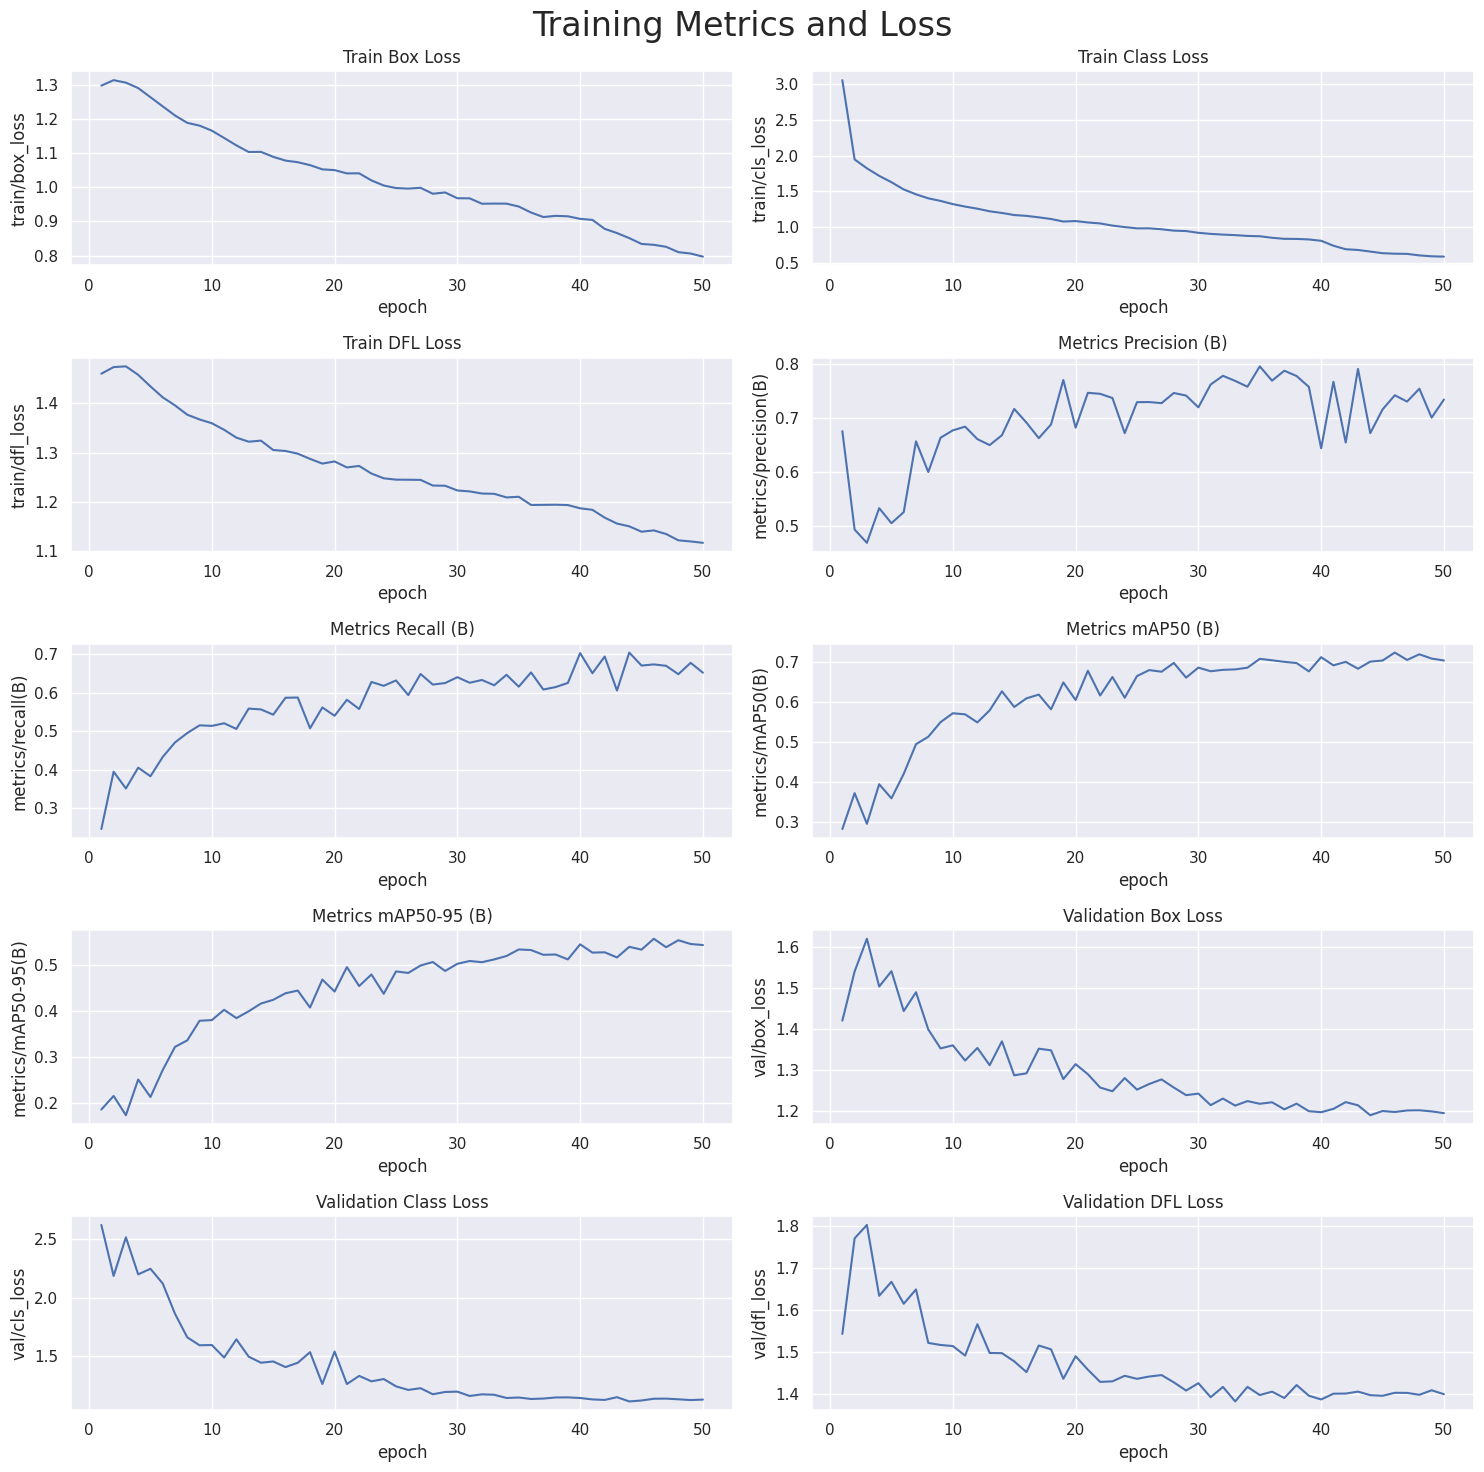

In [ ]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Fullstack Project/runs/train4/results.csv')

df.columns = df.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [ ]:
# Loading the best performing model
Valid_model = YOLO('/content/drive/My Drive/Colab Notebooks/Fullstack Project/runs/train4/weights/best.pt')

# Define the dataset path with a leading slash
dataset_path = '/content/drive/My Drive/Colab Notebooks/Fullstack Project/test'

# Evaluating the model on the testset
metrics = Valid_model.val(data=dataset_path, split='test')

In [ ]:
# Export the model
Final_model.export(format='onnx')

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/My Drive/Colab Notebooks/Fullstack Project/runs/train4/weights/best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 15, 3549) (5.9 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 56.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.9s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 11.8s, saved as '/content/drive/My Drive/Colab Notebooks/Fullstack Project/runs/train4/weights/best.onnx' (11.6 MB)

Export complete (12.1s)
Results saved to /content/drive/My Drive/Colab Notebooks/Fullstack Project/runs/train4/weig

'/content/drive/My Drive/Colab Notebooks/Fullstack Project/runs/train4/weights/best.onnx'

#### **Inference with Pictures**

In [ ]:
# Path to the directory containing the images
image_dir = '/content/drive/My Drive/Colab Notebooks/Fullstack Project/test/images'

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=4)

for image_path in random_images:
    image = cv2.imread(image_path)
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)


0: 416x416 1 general, 16.0ms
Speed: 1.3ms preprocess, 16.0ms inference, 2.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to /content/drive/My Drive/Colab Notebooks/Fullstack Project/runs/train42

0: 416x416 1 general, 12.4ms
Speed: 1.4ms preprocess, 12.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to /content/drive/My Drive/Colab Notebooks/Fullstack Project/runs/train43

0: 416x416 1 plastic, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)
Results saved to /content/drive/My Drive/Colab Notebooks/Fullstack Project/runs/train44

0: 416x416 1 organics, 12.4ms
Speed: 1.1ms preprocess, 12.4ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)
Results saved to /content/drive/My Drive/Colab Notebooks/Fullstack Project/runs/train45


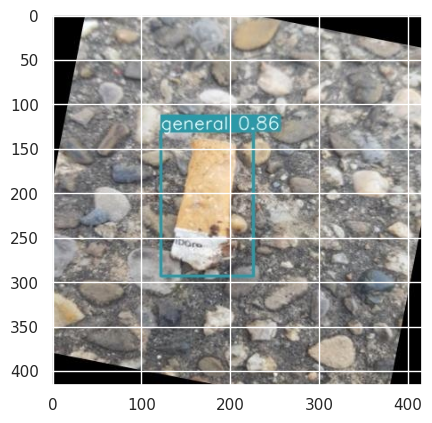

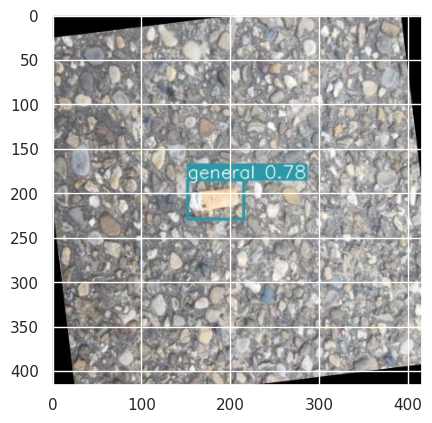

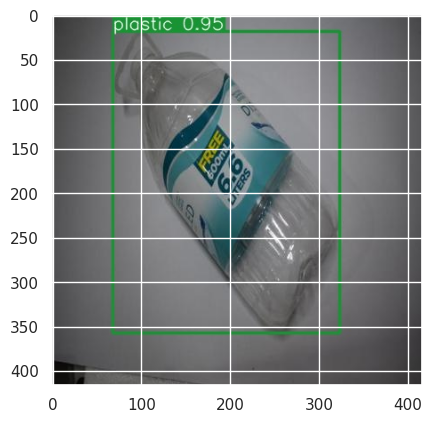

In [ ]:
# View results
for i in range(42, 45):
    plt.imshow(plt.imread(f'/content/drive/My Drive/Colab Notebooks/Fullstack Project/runs/train{i}/image0.jpg'))
    plt.show()
